In [1]:
import pandas as pd, numpy as np
from PIL import Image
from io import BytesIO
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display_png
from IPython.display import SVG as displaySvg

## Pictures

In [2]:
def drawMol(mol,legend='',highlightAtoms=[]):
    # d2d = Draw.MolDraw2DCairo(-1,-1)
    d2d = Draw.MolDraw2DSVG(-1,-1)
    dopts = d2d.drawOptions()
    dopts.useBWAtomPalette()
    dopts.continuousHighlight = True
    dopts.circleAtoms = False
    dopts.atomHighlightsAreCircles=False
    dopts.highlightRadius=0.1
    dopts.setHighlightColour((1,0,0,.5))
    # dopts.setBackgroundColour((1,1,1,0))
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    # bio = BytesIO(d2d.GetDrawingText())
    svg = d2d.GetDrawingText()
    return svg.replace('svg:','')
    # return Image.open(bio)

In [3]:
paracetamol = Chem.MolFromSmiles("c1(O)ccc(cc1)NC(C)=O")

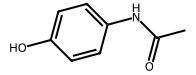

In [4]:
displaySvg(drawMol(paracetamol))

In [5]:
chemicals={"Indomethacin":Chem.CanonSmiles("CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)CC(=O)O"),
     "Serotonin":Chem.CanonSmiles("C1=CC2=C(C=C1O)C(=CN2)CCN"),
     "Sumatriptan":Chem.CanonSmiles("CNS(=O)(=O)CC1=CC2=C(C=C1)NC=C2CCN(C)C"),
          "Paracetamol":"c1(O)ccc(cc1)NC(C)=O"}
df = pd.DataFrame( list(chemicals.values()), columns=["canonSmiles"], index = chemicals.keys() )

In [7]:
patt=Chem.MolFromSmiles('c1ccc2[nH]ccc2c1')
df["img"]=df["mol"].apply(lambda mol : drawMol( mol, highlightAtoms=mol.GetSubstructMatch(patt)))

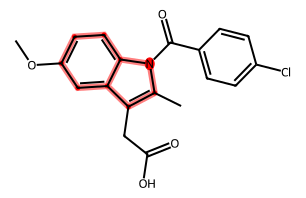

In [8]:
displaySvg(df.iloc[0,-1])

In [9]:
def MolToRestrictedSmiles(mol):
    match = mol.GetSubstructMatch(patt)
    order = set(range(mol.GetNumAtoms()))-set(match)
    np.random.shuffle(list(order))
    random_mol = Chem.RenumberAtoms(mol, newOrder=[*match,*order])
    return Chem.MolToSmiles(random_mol, canonical=False, isomericSmiles=False)

In [10]:
df["restrictSmiles"]=df["mol"].apply(MolToRestrictedSmiles)

In [11]:
df.restrictSmiles

Indomethacin    c1(OC)ccc2n(C(=O)c3ccc(Cl)cc3)c(C)c(CC(=O)O)c2c1
Serotonin                               c1(O)ccc2[nH]cc(CCN)c2c1
Sumatriptan              c1(CS(NC)(=O)=O)ccc2[nH]cc(CCN(C)C)c2c1
Paracetamol                                 c1(O)ccc(NC(C)=O)cc1
Name: restrictSmiles, dtype: object

## GoF

In [12]:
from chemicalgof import Smiles2GoF, GoF2Tokens

In [13]:
for s in chemicals.values():
    G=Smiles2GoF(s)
    T=GoF2Tokens(G)
    print(T.getString())

Cl.<3>c1ccccc1<0>.C=O.<4>c1ccc2[nH]ccc2c1<6>.<0>(O.C.)<5>(C.).C.C=O.O.
N.C.C.<6>c1ccc2[nH]ccc2c1<0>.O.
C.N.(C.).C.C.<6>c1ccc2[nH]ccc2c1<0>.C.O=[SH2]=O.N.C.
C.C=O.N.<0>c1ccccc1<3>.O.


In [14]:
def drawMolPNG(mol,legend='',highlightAtoms=[]):
    # d2d = Draw.MolDraw2DCairo(-1,-1)
    d2d = Draw.MolDraw2DSVG(-1,-1)
    dopts = d2d.drawOptions()
    dopts.useBWAtomPalette()
    dopts.continuousHighlight = True
    dopts.circleAtoms = False
    dopts.atomHighlightsAreCircles=False
    dopts.highlightRadius=0.1
    dopts.setHighlightColour((1,0,0,.5))
    dopts.setBackgroundColour((1,1,1,0))
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    # bio = BytesIO(d2d.GetDrawingText())
    svg = d2d.GetDrawingText()
    return svg.replace('svg:','')
    # return Image.open(bio)

In [15]:
benzene = drawMolPNG(Chem.MolFromSmiles("c1ccccc1"))

In [16]:
carbonile = drawMolPNG(Chem.MolFromSmiles("C=O"))

In [11]:
with open(f'carbonile.svg', 'w') as f:
    f.write(carbonile)

In [12]:
displaySvg(carbonile)